<a href="https://colab.research.google.com/github/MohammadNPak/MFTDjango04/blob/master/HWExtera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# from HODAHodaDatasetReader import read_hoda_dataset

from HodaDatasetReader import read_hoda_dataset

X_train,Y_train = read_hoda_dataset(
    '/content/drive/MyDrive/NNDL/HWExtera/HODA/Train 60000.cdb',
    images_height=40,
    images_width=40,
    one_hot=True,
    reshape=False)
    
X_test,Y_test = read_hoda_dataset(
    '/content/drive/MyDrive/NNDL/HWExtera/HODA/Test 20000.cdb',
    images_height=40,
    images_width=40,
    one_hot=True,
    reshape=False)

type(X_train)
print(X_train.shape)
print(Y_train.shape)

(60000, 40, 40, 1)
(60000, 10)


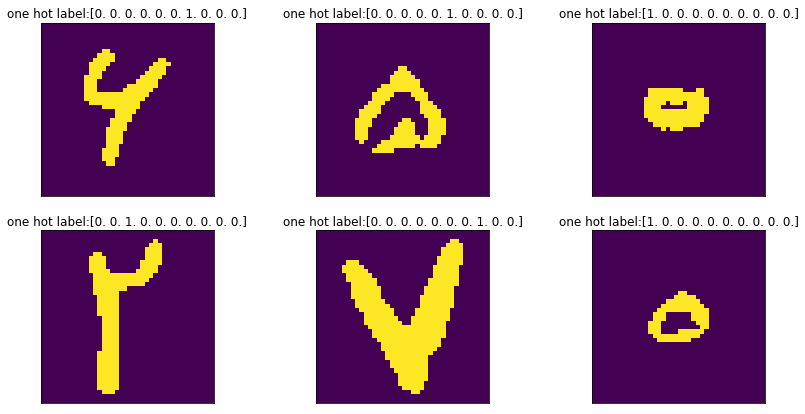

In [24]:
import random
import numpy as np
import pandas as pd
import sklearn
from tensorflow import keras
from matplotlib import pyplot as plt
random.seed(0)
np.random.seed(0)
%matplotlib inline

samples = [0,1,2,3,4,5]
fig,ax = plt.subplots(2,3,figsize=(14, 7))
fig.set
for i in samples:
    ax[i//3][i%3].imshow(X_train[i,:,:,0])
    ax[i//3][i%3].set_title(f"one hot label:{Y_train[i,:]}")
    ax[i//3][i%3].set_xticks([])
    ax[i//3][i%3].set_yticks([])


In [25]:

from tensorflow.keras.layers import (
    Input,
    Conv2D,
    Dropout,
    BatchNormalization,
    MaxPooling2D,
    Flatten,
    Dense)

from tensorflow.keras.models import Sequential

model = Sequential()
# 1st conv block
model.add(Input(shape=(40,40,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.1))
# 2end conv block
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.2))
# 3rd conv block
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.3))
# 4th conv block
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.4))
# Classification Block
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))
model.build()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 40, 40, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 19, 19, 128)      5

In [29]:

from tensorflow.keras.optimizers import SGD,Adadelta,Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import clone_model
from tensorflow.keras.metrics import (
    CategoricalAccuracy,
    TruePositives,
    TrueNegatives,
    FalsePositives,
    FalseNegatives,
    Precision,
    Recall)
    

model_adam = clone_model(model)
model_adadelta = clone_model(model)
model_momentum = clone_model(model)

model_adam.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=[
        CategoricalAccuracy(),
        TruePositives(),
        TrueNegatives(),
        FalsePositives(),
        FalseNegatives(),
        Precision(),
        Recall()]
)
model_adadelta.compile(
    optimizer=Adadelta(),
    loss=categorical_crossentropy,
    metrics=[
        CategoricalAccuracy(),
        TruePositives(),
        TrueNegatives(),
        FalsePositives(),
        FalseNegatives(),
        Precision(),
        Recall()]
)
model_momentum.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.95),
    loss=categorical_crossentropy,
        metrics=[
        CategoricalAccuracy(),
        TruePositives(),
        TrueNegatives(),
        FalsePositives(),
        FalseNegatives(),
        Precision(),
        Recall()]
)


In [30]:
report_adam = model_adam.fit(
    x=X_train,
    y=Y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test,Y_test)
)
model_adam.save('model_adam')
result_adam = pd.DataFrame(report_adam.history)
result_adam.to_csv('result_adam.csv')


report_adadelta = model_adadelta.fit(
    x=X_train,
    y=Y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test,Y_test))

model_adadelta.save('model_adadelta')
result_adadelta = pd.DataFrame(report_adadelta.history)
result_adadelta.to_csv('result_adadelta.csv')

report_momentum = model_momentum.fit(
    x=X_train,
    y=Y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test,Y_test))

model_momentum.save('model_momentum')
result_momentum = pd.DataFrame(report_momentum.history)
result_momentum.to_csv('result_momentum.csv')


Epoch 1/100
938/938 [==============================] - 34s 34ms/step - loss: 0.1224 - categorical_accuracy: 0.9634 - true_positives_6: 57636.0000 - true_negatives_6: 538220.0000 - false_positives_6: 1780.0000 - false_negatives_6: 2364.0000 - precision_6: 0.9700 - recall_6: 0.9606 - val_loss: 0.1079 - val_categorical_accuracy: 0.9722 - val_true_positives_6: 19412.0000 - val_true_negatives_6: 179466.0000 - val_false_positives_6: 534.0000 - val_false_negatives_6: 588.0000 - val_precision_6: 0.9732 - val_recall_6: 0.9706
Epoch 2/100
938/938 [==============================] - 30s 32ms/step - loss: 0.0345 - categorical_accuracy: 0.9902 - true_positives_6: 59387.0000 - true_negatives_6: 539439.0000 - false_positives_6: 561.0000 - false_negatives_6: 613.0000 - precision_6: 0.9906 - recall_6: 0.9898 - val_loss: 0.0682 - val_categorical_accuracy: 0.9823 - val_true_positives_6: 19642.0000 - val_true_negatives_6: 179660.0000 - val_false_positives_6: 340.0000 - val_false_negatives_6: 358.0000 - val

Epoch 1/100
938/938 [==============================] - 32s 32ms/step - loss: 3.4593 - categorical_accuracy: 0.1318 - true_positives_7: 4159.0000 - true_negatives_7: 514633.0000 - false_positives_7: 25367.0000 - false_negatives_7: 55841.0000 - precision_7: 0.1409 - recall_7: 0.0693 - val_loss: 2.1288 - val_categorical_accuracy: 0.2204 - val_true_positives_7: 707.0000 - val_true_negatives_7: 179938.0000 - val_false_positives_7: 62.0000 - val_false_negatives_7: 19293.0000 - val_precision_7: 0.9194 - val_recall_7: 0.0353
Epoch 2/100
938/938 [==============================] - 29s 31ms/step - loss: 2.8664 - categorical_accuracy: 0.2145 - true_positives_7: 7884.0000 - true_negatives_7: 517023.0000 - false_positives_7: 22977.0000 - false_negatives_7: 52116.0000 - precision_7: 0.2555 - recall_7: 0.1314 - val_loss: 1.9395 - val_categorical_accuracy: 0.2503 - val_true_positives_7: 2442.0000 - val_true_negatives_7: 177005.0000 - val_false_positives_7: 2995.0000 - val_false_negatives_7: 17558.0000 

Epoch 1/100
938/938 [==============================] - 32s 32ms/step - loss: 0.1655 - categorical_accuracy: 0.9555 - true_positives_8: 57213.0000 - true_negatives_8: 537702.0000 - false_positives_8: 2298.0000 - false_negatives_8: 2787.0000 - precision_8: 0.9614 - recall_8: 0.9535 - val_loss: 0.1066 - val_categorical_accuracy: 0.9744 - val_true_positives_8: 19482.0000 - val_true_negatives_8: 179501.0000 - val_false_positives_8: 499.0000 - val_false_negatives_8: 518.0000 - val_precision_8: 0.9750 - val_recall_8: 0.9741
Epoch 2/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0426 - categorical_accuracy: 0.9888 - true_positives_8: 59307.0000 - true_negatives_8: 539342.0000 - false_positives_8: 658.0000 - false_negatives_8: 693.0000 - precision_8: 0.9890 - recall_8: 0.9884 - val_loss: 0.0453 - val_categorical_accuracy: 0.9876 - val_true_positives_8: 19748.0000 - val_true_negatives_8: 179761.0000 - val_false_positives_8: 239.0000 - val_false_negatives_8: 252.0000 - val